In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mserr
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#Reading the datasets
data = pd.read_csv("E:\\2ndMSIT\\Intro to ML\\DataScience_2019501037\\collegeAdmissionKaggle\\archive\\Admission_Predict.csv",index_col=0)
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1,0.82
397,325,107,3,3.0,3.5,9.11,1,0.84
398,330,116,4,5.0,4.5,9.45,1,0.91


In [3]:
# data.drop('Serial No.',axis=1,inplace=True)
data.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [4]:
train_x=data[:280]
test_x=data[280:]
print (test_x.shape)
print (train_x.shape)

(120, 8)
(280, 8)


In [5]:
train_y=train_x['Chance of Admit ']
train_y.shape

(280,)

In [6]:
train_x.drop('Chance of Admit ',axis=1,inplace=True)
train_x


C:\Users\MEESALA ARAVIND\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
1,337,118,4,4.5,4.5,9.65,1
2,324,107,4,4.0,4.5,8.87,1
3,316,104,3,3.0,3.5,8.00,1
4,322,110,3,3.5,2.5,8.67,1
5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
276,322,110,3,3.5,3.0,8.96,1
277,329,113,5,5.0,4.5,9.45,1
278,320,101,2,2.5,3.0,8.62,0


In [7]:
test_x.drop('Chance of Admit ',axis=1,inplace=True)
test_x

C:\Users\MEESALA ARAVIND\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
281,311,102,3,4.5,4.0,8.64,1
282,317,110,3,4.0,4.5,9.11,1
283,312,106,3,4.0,3.5,8.79,1
284,321,111,3,2.5,3.0,8.90,1
285,340,112,4,5.0,4.5,9.66,1
...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1
397,325,107,3,3.0,3.5,9.11,1
398,330,116,4,5.0,4.5,9.45,1


In [8]:
#Train dataset
train_col_with_nullvalues=[[col,float(train_x[col].isnull().sum())/float(sample_size)] for col in train_x.columns if train_x[col].isnull().sum()]
train_col_with_nullvalues

[]

In [9]:
#Test dataset
test_col_with_nullvalues=[[col,float(test_x[col].isnull().sum())/float(sample_size)] for col in test_x.columns if test_x[col].isnull().sum()]
test_col_with_nullvalues

[]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y.values.ravel(), test_size=0.3, random_state=42)

In [11]:
# Applying regression techniques(Linear, Ridge, Lasso, Elasticnet)


reg = LinearRegression()
reg = LinearRegression().fit(X_train, y_train)
print(reg.score(X_train,y_train))
print(reg.score(X_test,y_test))



0.8115231322898682
0.7234004279406759


In [12]:
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error
lin = LinearRegression()
lin.fit(X_train, y_train)
# print(lin.coef_)
lin.intercept_
predictions = lin.predict(X_test)
print(sqrt(mean_squared_error(y_test, predictions)))
import sklearn
from sklearn.metrics import r2_score
sklearn.metrics.r2_score(y_test, predictions, sample_weight=None, multioutput='uniform_average')

0.07489847228592986


0.7234004279406759

In [13]:
import statsmodels.api as sm
from statsmodels.api import OLS
model = sm.OLS(y_train,X_train)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              2662.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):                   3.89e-185
Time:                        23:37:45   Log-Likelihood:                          232.50
No. Observations:                 196   AIC:                                     -451.0
Df Residuals:                     189   BIC:                                     -428.1
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

In [14]:
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error
Ridgereg = Ridge(alpha = 0.5,tol = 0.1)
Ridgereg = Ridgereg.fit(X_train,y_train)
# print(Ridgereg.score(X_train,y_train))
# print(Ridgereg.score(X_test,y_test))

print(sqrt(mean_squared_error(y_test, Ridgereg.predict(X_test))))
print('R2 Value/Coefficient of Determination: {}'.format(Ridgereg.score(X_test,y_test)))
                                                                       

0.07494464345755415
R2 Value/Coefficient of Determination: 0.7230593031555543


In [15]:
from sklearn.linear_model import Lasso
from math import sqrt
from sklearn.metrics import r2_score, mean_squared_error


lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(X_train, y_train)
# lassoreg.predict(X_train)
print(sqrt(mean_squared_error(y_test, lassoreg.predict(X_test))))
print('R2 Value/Coefficient of Determination: {}'.format(lassoreg.score(X_test, y_test)))




0.07536282830421527
R2 Value/Coefficient of Determination: 0.7199600685938726


In [16]:
from sklearn.linear_model import ElasticNet
Elas = ElasticNet(alpha=0.001, normalize=True)
Elas.fit(X_train, y_train)

# print(sqrt(mean_squared_error(ytrain, Elas.predict(xtrain))))
print(sqrt(mean_squared_error(y_test, Elas.predict(X_test))))
print('R2 Value/Coefficient of Determination: {}'.format(Elas.score(X_test, y_test)))


0.07411529785257978
R2 Value/Coefficient of Determination: 0.7291547012986337


In [17]:
score_train=[]
score_test=[]
mse_train=[]
mse_test=[]
alpha=[]
for sigma in np.linspace(0.1, 10,10):
    alpha.append(sigma)
    Ridgereg = Ridge(alpha = 0.5,tol = 0.0001)
    Ridgereg = Ridgereg.fit(X_train,y_train)
    score_train.append(round(Ridgereg.score(X_train, y_train),10))
    score_test.append(round(Ridgereg.score(X_test, y_test),10))
#     print("score_train = ",score_train)
#     print("score_test = ", score_test)
    mse_train.append(sqrt(mean_squared_error(y_train, Ridgereg.predict(X_train))))
    mse_test.append(sqrt(mean_squared_error(y_test, Ridgereg.predict(X_test))))
print(alpha,'\n',"Score train = ", score_train, '\n',"Score test = ", score_test,'\n',"MSE train =", mse_train, '\n',mse_test) 

[0.1, 1.2000000000000002, 2.3000000000000003, 3.4000000000000004, 4.5, 5.6, 6.7, 7.800000000000001, 8.9, 10.0] 
 Score train =  [0.8114751283, 0.8114751283, 0.8114751283, 0.8114751283, 0.8114751283, 0.8114751283, 0.8114751283, 0.8114751283, 0.8114751283, 0.8114751283] 
 Score test =  [0.7230593032, 0.7230593032, 0.7230593032, 0.7230593032, 0.7230593032, 0.7230593032, 0.7230593032, 0.7230593032, 0.7230593032, 0.7230593032] 
 MSE train = [0.06280601766176487, 0.06280601766176487, 0.06280601766176487, 0.06280601766176487, 0.06280601766176487, 0.06280601766176487, 0.06280601766176487, 0.06280601766176487, 0.06280601766176487, 0.06280601766176487] 
 [0.07494464345755415, 0.07494464345755415, 0.07494464345755415, 0.07494464345755415, 0.07494464345755415, 0.07494464345755415, 0.07494464345755415, 0.07494464345755415, 0.07494464345755415, 0.07494464345755415]


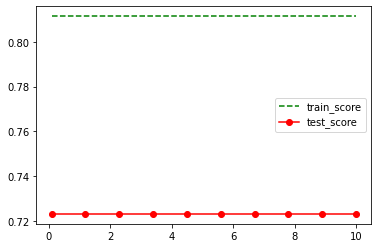

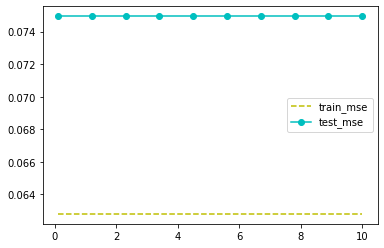

In [18]:
plt.figure(1)
plt.plot(alpha, score_train, 'g--',label="train_score")
plt.plot(alpha, score_test, 'r-o',label="test_score")
plt.xlabel='Alpha'
plt.legend()
plt.figure(2)
plt.plot(alpha, mse_train, 'y--',label="train_mse")
plt.plot(alpha, mse_test, 'c-o',label="test_mse")
plt.xlabel='Alpha'
plt.legend()
plt.show()

In [19]:
test_x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
Serial No.,,,,,,,
281,311,102,3,4.5,4.0,8.64,1
282,317,110,3,4.0,4.5,9.11,1
283,312,106,3,4.0,3.5,8.79,1
284,321,111,3,2.5,3.0,8.90,1
285,340,112,4,5.0,4.5,9.66,1
...,...,...,...,...,...,...,...
396,324,110,3,3.5,3.5,9.04,1
397,325,107,3,3.0,3.5,9.11,1
398,330,116,4,5.0,4.5,9.45,1


In [20]:
testpred=pd.DataFrame(Elas.predict(test_x),columns=['Chance of Admit '])
testpred.index.name = 'Id'
testpred.to_csv("test_pred_1.csv")